# Data Evaluation

- Ziel ist es, die erstellten Modelle auf Performance und Overfitting zu evaluieren
- wir haben die Modelle DecisionTree, RandomForest, kNN Classifier und Categorical Naive Bayes Classifier aufgrund guter Ergebnisse in Laufzeit und Accuracy für eine genauere Analyse ausgewählt

1. Decision Tree

In [2]:
import pandas as pd;
from matplotlib import pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from confusion_matrix_utils import cross_val_predict, plot_confusion_matrix

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
cleaned_data = pd.read_csv('cleaned_data.csv')
crime_cats_with_occs = cleaned_data[['CRIME_CAT','Crm.Cd']].groupby('CRIME_CAT')['Crm.Cd'].count().to_dict()
sorted_labels = list(map(lambda x: x[0], sorted(list(crime_cats_with_occs.items()), key=lambda x: x[1], reverse=True)))

In [28]:
features = ['TIME.OCC_hour_cos','LAT','LONG']
target = 'CRIME_CAT'
selection = features + [target]

predict_data_encoded = cleaned_data[selection].copy()
#predict_data_encoded = pd.get_dummies(predict_data, columns=['AREA.NAME'])

X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
dec_tree = tree.DecisionTreeClassifier()
score = cross_validate(dec_tree, predict_data_encoded[features], predict_data_encoded[target], cv=5, return_train_score=True)
dec_tree.fit(X_train,y_train)

print(f'Model Accuracy: {dec_tree.score(X_test,y_test)}')
print(dec_tree.get_depth())

47
0.2727268232258736 0.0005717973927797245


- zusammen mit `RD` betrachtet tatsächlich etwas besser (ca. 0,5%)
- Rechenzeit jedoch fast doppelt so hoch

In [48]:
results_dec_tree_TIME_occ_hour_cos_lat_long = []
for i in range(1, 40):
    dec_tree = tree.DecisionTreeClassifier(max_depth=i)
    score = cross_validate(dec_tree, predict_data_encoded[features], predict_data_encoded[target], cv=5, return_train_score=True)
    print(f"Max Depth: {i}, Test Accuracy: {round(score['test_score'].mean(), ndigits=4)} ({round(score['test_score'].std(), ndigits=4)}), Train Accuracy: {round(score['train_score'].mean(), ndigits=4)} ({round(score['train_score'].std(), ndigits=4)})")
    results_dec_tree_TIME_occ_hour_cos_lat_long.append((score['test_score'].mean(),score['test_score'].std(),score['train_score'].mean(),score['train_score'].std()))
print(results_dec_tree_TIME_occ_hour_cos_lat_long)

Max Depth: 1, Test Accuracy: 0.1804 (0.0049), Train Accuracy: 0.1831 (0.0045)
Max Depth: 2, Test Accuracy: 0.1946 (0.0033), Train Accuracy: 0.1942 (0.0028)
Max Depth: 3, Test Accuracy: 0.1984 (0.0034), Train Accuracy: 0.1984 (0.0019)
Max Depth: 4, Test Accuracy: 0.2011 (0.0034), Train Accuracy: 0.2013 (0.0014)
Max Depth: 5, Test Accuracy: 0.2022 (0.0049), Train Accuracy: 0.2042 (0.0013)
Max Depth: 6, Test Accuracy: 0.2057 (0.0027), Train Accuracy: 0.2081 (0.0011)
Max Depth: 7, Test Accuracy: 0.2093 (0.0022), Train Accuracy: 0.2126 (0.0014)
Max Depth: 8, Test Accuracy: 0.2135 (0.0024), Train Accuracy: 0.2174 (0.0012)
Max Depth: 9, Test Accuracy: 0.2179 (0.0025), Train Accuracy: 0.2242 (0.0018)
Max Depth: 10, Test Accuracy: 0.222 (0.0031), Train Accuracy: 0.231 (0.0024)
Max Depth: 11, Test Accuracy: 0.2269 (0.0022), Train Accuracy: 0.2389 (0.0021)
Max Depth: 12, Test Accuracy: 0.2306 (0.0019), Train Accuracy: 0.2474 (0.0023)
Max Depth: 13, Test Accuracy: 0.2352 (0.0019), Train Accuracy: 

In [29]:
results_dec_tree_TIME_occ_hour_cos_lat_long = [(0.18038084136557025, 0.004884301135223393, 0.1830914391327704, 0.004541777448432953), (0.19462378738083547, 0.003278193996493177, 0.1941985169016264, 0.002846601599333509), (0.19843808382154166, 0.003420792407360242, 0.19836755155613167, 0.0018985575935053284), (0.20110406219191898, 0.0033678488269967446, 0.20132986320037652, 0.0014048796050944359), (0.20219068477489593, 0.004924031143510782, 0.20423459461125856, 0.0013422491846157725), (0.20572037479389982, 0.0027353954511652235, 0.2080521829568763, 0.0010924102052051693), (0.2092665136485415, 0.002237738172529344, 0.2125714310371643, 0.0014014643413931217), (0.21351184302925813, 0.002422206469552559, 0.21735349292502795, 0.0012060598127805913), (0.2178854935046049, 0.0024941777373494603, 0.2242339534893852, 0.0018476439102932908), (0.22203951513356918, 0.0031139022971799473, 0.23100727326805784, 0.0024367174691736996), (0.22686723183932753, 0.0021597569748149185, 0.23892336026316094, 0.002105097428457597), (0.23055074024269656, 0.0018968385949371532, 0.24735726078763803, 0.0023145295474786658), (0.23517610126494265, 0.0018611791036137362, 0.25775136651567243, 0.002484452644169231), (0.238218819286291, 0.0016532417994199397, 0.2694918282449647, 0.0027760731220873988), (0.24096211896848563, 0.0020211800261581005, 0.2835174138655266, 0.0034389618305107742), (0.2450848858529023, 0.0009121925091132711, 0.2996346119433809, 0.004365585688265474), (0.24677199776757935, 0.0022109894667940236, 0.31765916449995213, 0.005031857492522387), (0.24770233662034866, 0.003184197051779758, 0.33794663136106023, 0.005775608456886865), (0.24875441715731766, 0.004533909486236721, 0.36008777961000327, 0.006661219455386985), (0.24944127486782527, 0.007153758875936261, 0.38353765065727663, 0.007380486610709177), (0.2490028440430668, 0.009350031102915005, 0.4078411527775095, 0.007845889130428035), (0.24867957369222166, 0.01135497674142519, 0.4322910740368943, 0.008559379487845372), (0.24832833649373023, 0.013786639328384446, 0.4559889525098214, 0.008846773354558886), (0.24778461585851255, 0.016220750736908752, 0.478346438794898, 0.009031646174642756), (0.24716439367140647, 0.01759468816007754, 0.49904478359299526, 0.009081504648106078), (0.2464043336328245, 0.0193636426442963, 0.5174310650267093, 0.009089673631497599), (0.24564180622525375, 0.021236753890163905, 0.5333806623583801, 0.009020098371376246), (0.24497634146994124, 0.022262087695632753, 0.5467138421817759, 0.00901601666415551), (0.24432486048861177, 0.023175796901660085, 0.5576619547396373, 0.00897080065565073), (0.2438814924459991, 0.02433342601578385, 0.566428999598589, 0.008985414201409088), (0.24341097840505554, 0.024998238001917104, 0.5732730608940229, 0.009120338059542557), (0.2431197861211837, 0.025424635099073625, 0.5784639444306711, 0.009247473155401456), (0.24311156104364318, 0.02587076536646952, 0.5823662582985696, 0.00943708560952687), (0.2431025130801082, 0.026092208114765654, 0.5851663165644683, 0.009612060822063999), (0.24299886831086934, 0.026220038582314444, 0.587150787940471, 0.009753994799596613), (0.24277183717482834, 0.02659979145646104, 0.5885133897220319, 0.00982902086608953), (0.2428253045160884, 0.026447658909634637, 0.58944434327718, 0.009881561082439781), (0.24271425663507634, 0.026596112270016424, 0.5900635394578284, 0.00989496515896086), (0.2427109663124294, 0.026587852495451217, 0.5904982723416354, 0.009891247961448697)]


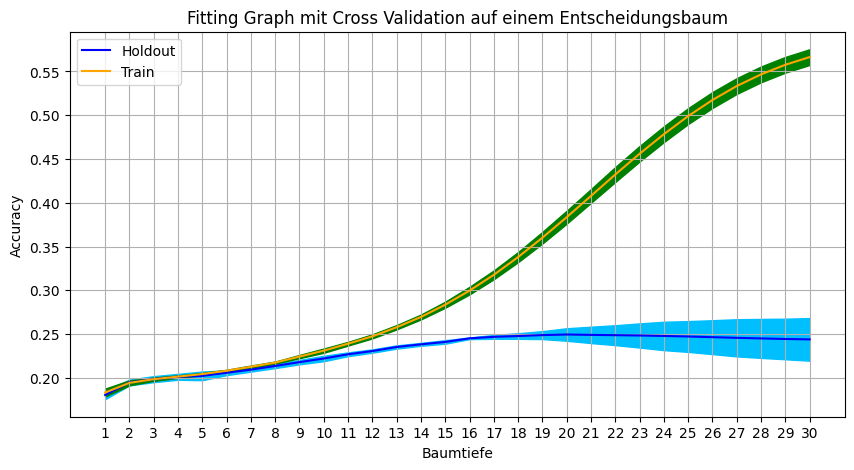

In [31]:
test_acc_list = list(map(lambda x: x[0], results_dec_tree_TIME_occ_hour_cos_lat_long))[:30]
test_std_list = list(map(lambda x: x[1], results_dec_tree_TIME_occ_hour_cos_lat_long))[:30]
train_acc_list = list(map(lambda x: x[2], results_dec_tree_TIME_occ_hour_cos_lat_long))[:30]
train_std_list = list(map(lambda x: x[3], results_dec_tree_TIME_occ_hour_cos_lat_long))[:30]

lower_bound_test = np.array(test_acc_list) - np.array(test_std_list)
upper_bound_test = np.array(test_acc_list) + np.array(test_std_list)
lower_bound_train = np.array(train_acc_list) - np.array(train_std_list)
upper_bound_train = np.array(train_acc_list) + np.array(train_std_list)

tree_depth = list(range(1,31))
N = len(tree_depth)
tree_quantity = np.arange(N)
plt.subplots(figsize=(10, 5))

plt.plot(tree_quantity, test_acc_list, label="Holdout", 
color="blue")
plt.fill_between(tree_quantity, lower_bound_test, upper_bound_test, color="deepskyblue")


plt.plot(tree_quantity, train_acc_list, label="Train", 
color="orange")
plt.fill_between(tree_quantity, lower_bound_train, upper_bound_train, color="green")


plt.xticks(tree_quantity, tree_depth)
plt.grid(True)
plt.xlabel("Baumtiefe")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Fitting Graph mit Cross Validation auf einem Entscheidungsbaum', fontsize=12)
plt.show()

### Confusion Matrix

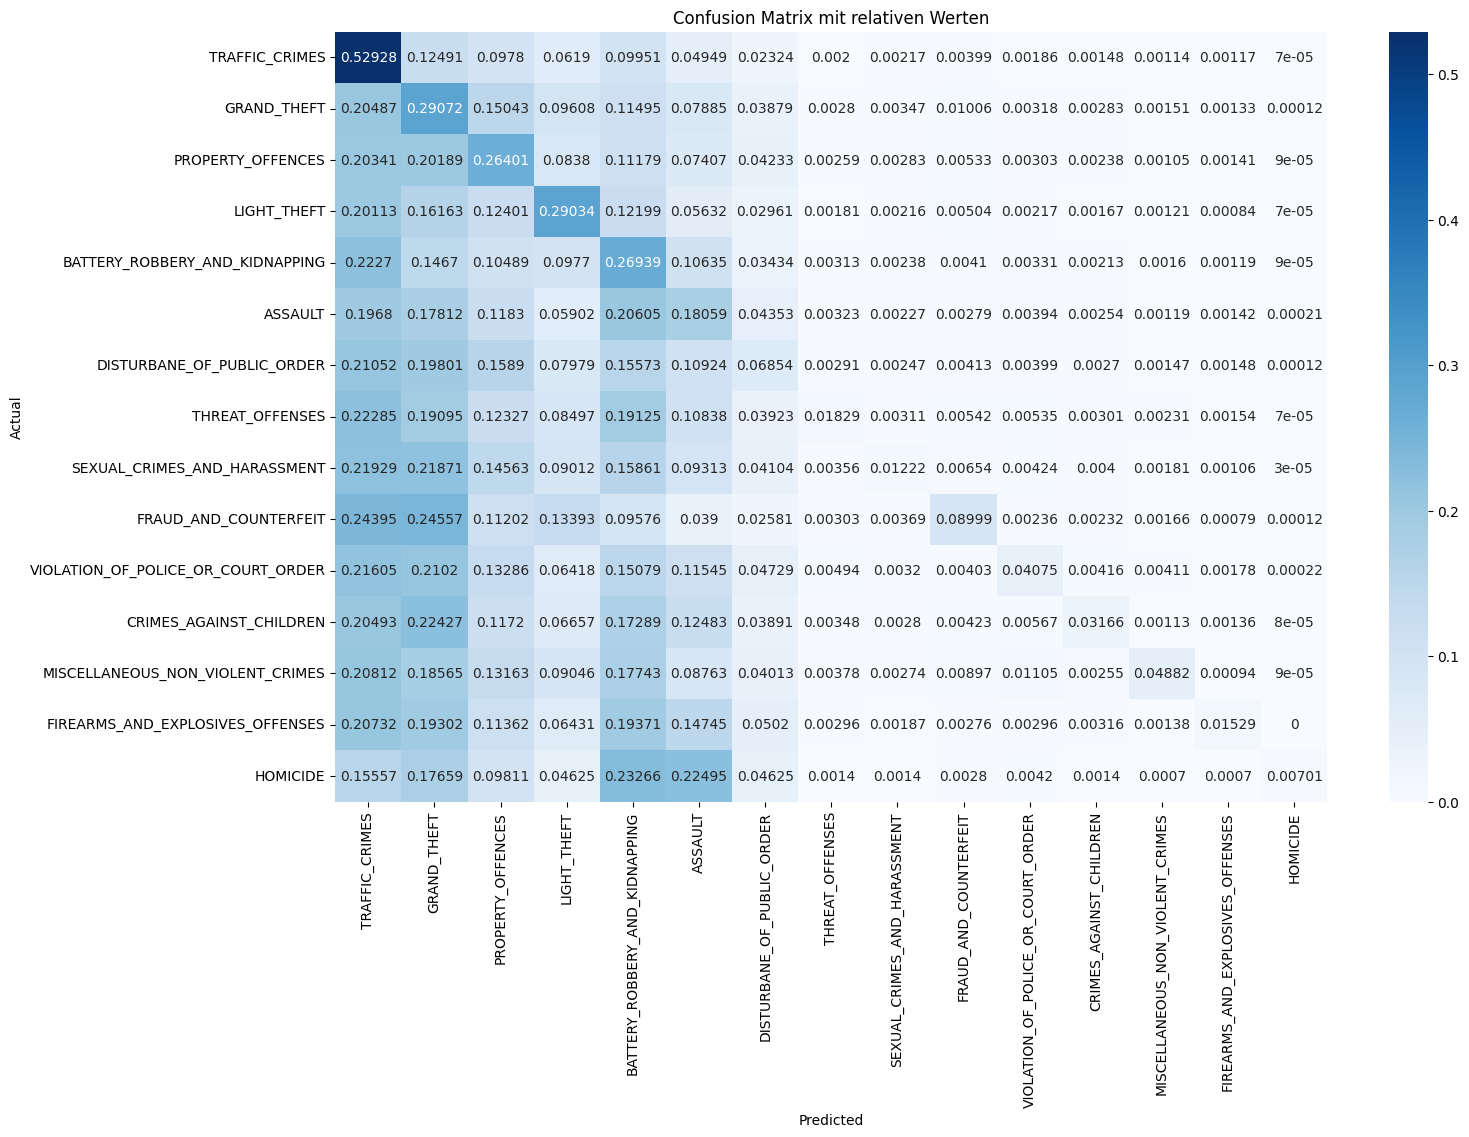

In [2]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)


dec_tree = tree.DecisionTreeClassifier(max_depth=20)

features = ['TIME.OCC_hour_cos','LAT','LONG']
target = 'CRIME_CAT'
selection = features + [target]

predict_data_encoded = cleaned_data[selection].copy()
actual_classes, predict_classes, _ = cross_val_predict(dec_tree, kfold, np.array(predict_data_encoded[features]), np.array(predict_data_encoded[target]))
plot_confusion_matrix(actual_classes, predict_classes, sorted_labels, mode='relative')

## Baseline Performance

### 1. Majority Classifier

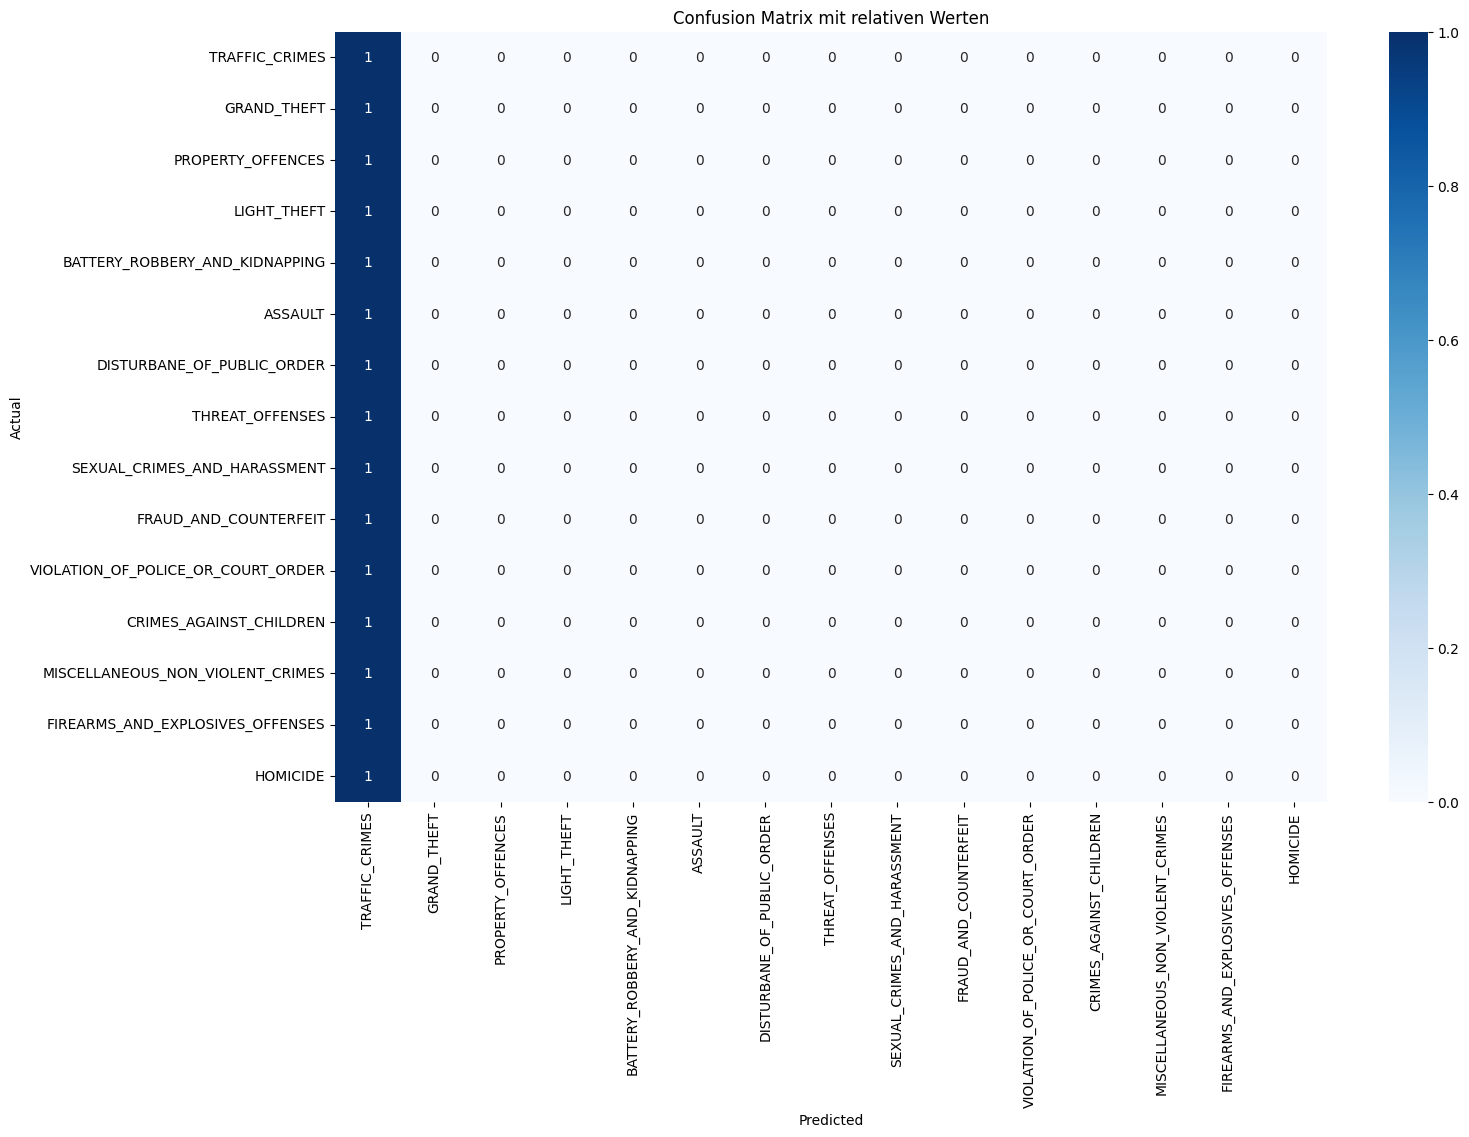

In [14]:
from sklearn.dummy import DummyClassifier

features = ['RD','LAT','LONG','UNIX.TIMESTAMP','TIME.OCC_hour',
            'DATE.OCC_day','DATE.OCC_weekday','DATE.OCC_weekend','DATE.OCC_month',
            'DATE.OCC_year','TIME.OCC_hour_cos','DATE.OCC_day_cos','DATE.OCC_weekday_cos',
            'DATE.OCC_month_cos']
target = 'CRIME_CAT'
selection = features + [target]
dummy_classifier = DummyClassifier(strategy='most_frequent')
predict_data_encoded = cleaned_data[selection].copy()
# score = cross_validate(dummy_classifier, predict_data_encoded[features], predict_data_encoded[target], cv=5)
# print(score['test_score'].mean(), score['test_score'].std())

actual_classes, predict_classes, _ = cross_val_predict(dummy_classifier, kfold, np.array(predict_data_encoded[features]), np.array(predict_data_encoded[target]))
plot_confusion_matrix(actual_classes, predict_classes, sorted_labels, mode='relative')

### 2. Conditional Classifier - Decision Stump

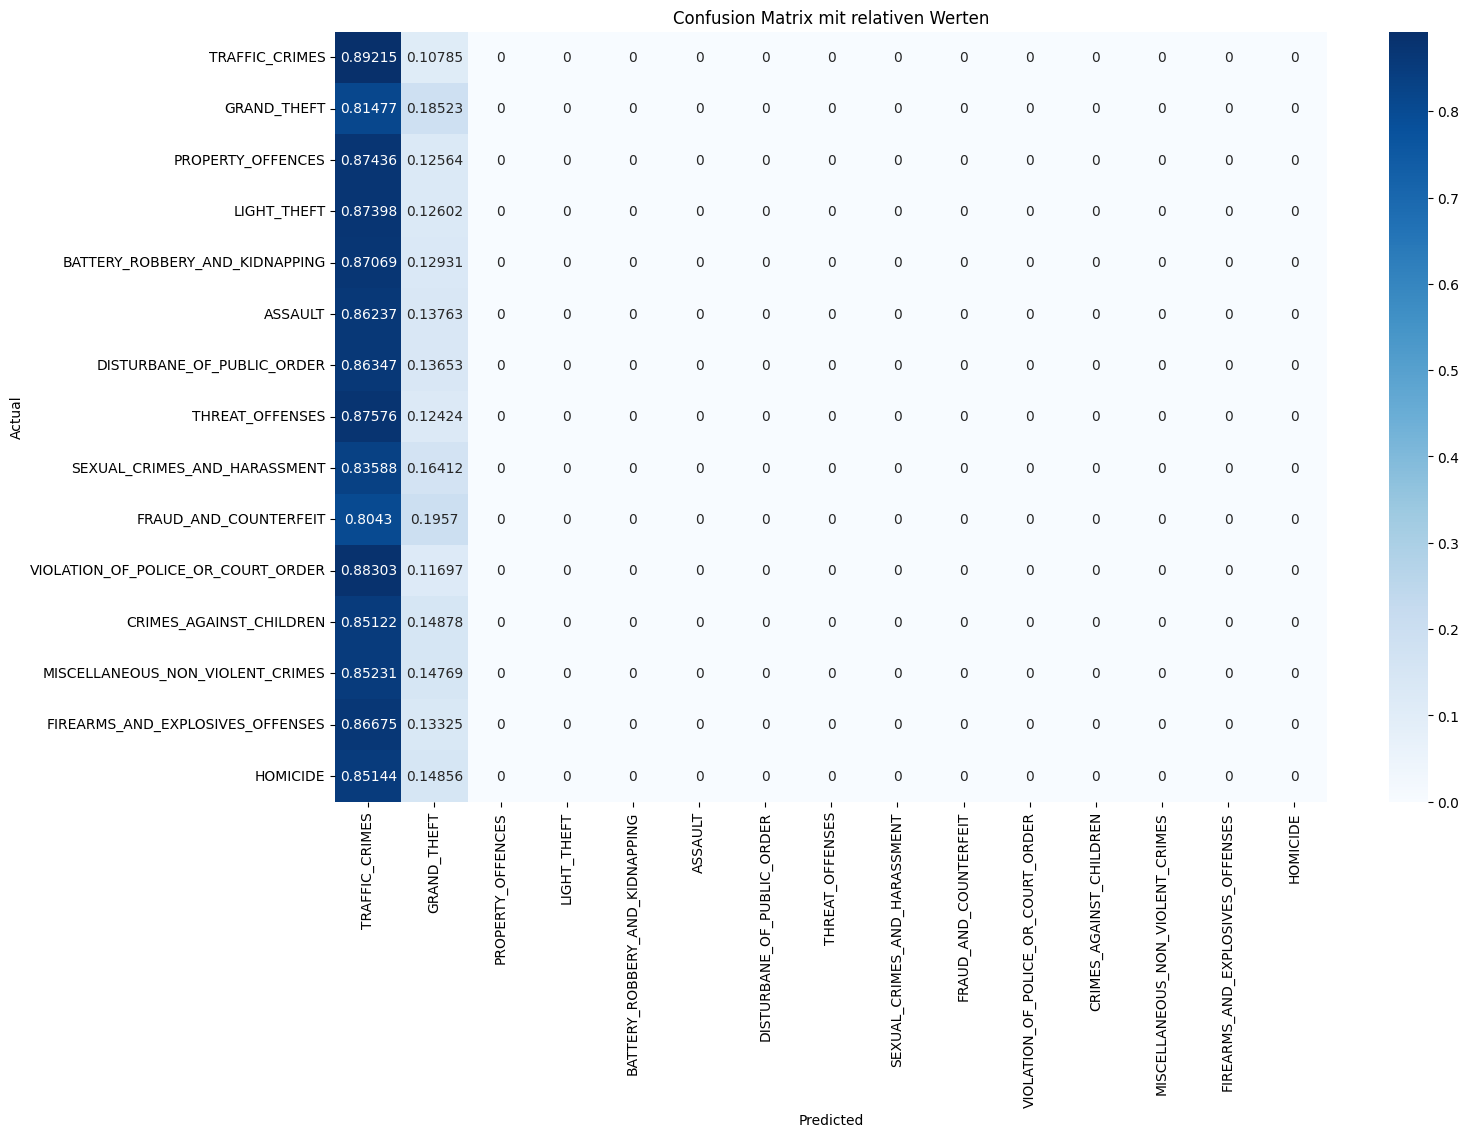

In [13]:
features = ['RD','LAT','LONG','UNIX.TIMESTAMP','TIME.OCC_hour',
            'DATE.OCC_day','DATE.OCC_weekday','DATE.OCC_weekend','DATE.OCC_month',
            'DATE.OCC_year','TIME.OCC_hour_cos','DATE.OCC_day_cos','DATE.OCC_weekday_cos',
            'DATE.OCC_month_cos']
target = 'CRIME_CAT'
selection = features + [target]

dec_stump = tree.DecisionTreeClassifier(max_depth=1)
predict_data_encoded = cleaned_data[selection].copy()
# score = cross_validate(dec_stump, predict_data_encoded[features], predict_data_encoded[target], cv=5, return_estimator=True)
# fitted_tree = score['estimator'][np.array(score['test_score']).argmax()]
# print(score['test_score'].mean(), score['test_score'].std())
# fig = plt.figure(figsize=(25,20))
# tree.plot_tree(fitted_tree, 
#                    feature_names=features,  
#                    class_names=sorted_labels,
#                    filled=True)

actual_classes, predict_classes, _ = cross_val_predict(dec_stump, kfold, np.array(predict_data_encoded[features]), np.array(predict_data_encoded[target]))
plot_confusion_matrix(actual_classes, predict_classes, sorted_labels, mode='relative')

## Categorical Naive Bayes

In [8]:
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import CategoricalNB

# Build a Gaussian Classifier
nb_class = CategoricalNB()

features = ['TIME.OCC_hour','DATE.OCC_weekday','DATE.OCC_day','DATE.OCC_month','DATE.OCC_year','RD','LOCATION.street','LAT','LONG']
target = 'CRIME_CAT'
selection = features + [target]
predict_data_encoded = cleaned_data[selection].copy()
predict_data_encoded['LOCATION.street']= LabelEncoder().fit_transform(predict_data_encoded['LOCATION.street'])

X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
nb_class.fit(X_train,y_train)

print(f'Model Accuracy: {nb_class.score(X_test,y_test)}')

# Confusion matrix
# actual_classes, predict_classes, _ = cross_val_predict(CategoricalNB(), kfold, np.array(predict_data_encoded[features]), np.array(predict_data_encoded[target]))
# plot_confusion_matrix(actual_classes, predict_classes, sorted_labels, mode='relative')

# Lernkurve
# test_sizes = list(np.flip(np.linspace(0.1,1,9,endpoint=False)))
# learning_curve = []
# for test_size in test_sizes:
#     model = CategoricalNB()
#     X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded[features], predict_data_encoded[target], test_size=test_size, random_state=42)
#     model.fit(X_train,y_train)
#     score = model.score(X_test,y_test)
#     learning_curve.append(score)
#     print(f'Score {test_size}: {score}')
# print(learning_curve)

ValueError: Negative values in data passed to CategoricalNB (input X)

### kNN
1. Fitting graph

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predict_data = cleaned_data.copy()

target = 'CRIME_CAT'
#Enthalten: 
features = ['LAT','LONG','TIME.OCC_hour_cos','DATE.OCC_day_cos','DATE.OCC_month_cos','RD','DATE.OCC_weekday_cos']

################

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

# Schritt 2: Daten normalisieren
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(predict_data[features])
y = predict_data[target]

# Schritt 3: Feature Selection
# Sucht sich tatsächlich immer LAT, LONG, RD und TIME.OCC_hour_cos
selector = SelectKBest(k=4)

X_selected = selector.fit_transform(X_scaled, y)

# weights = distance and metric = manhattan all the time the same
# print(3)
# # Schritt 4: Parameter Grid für die Grid Search festlegen
# param_grid = {
#     'n_neighbors': [11],
#     'weights': ['uniform', 'distance'],
#     'metric': ['manhattan']
# }

results = []

for i in range(1,22,2):
#for i in range(1, 21,2):
    # Schritt 5: Grid Search durchführen
    model = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights='distance')
    # grid_search = GridSearchCV(model, param_grid)
    # grid_search.fit(X_train_selected, y_train)
    # grid_search.score(X_test_selected, y_test)
    # print(grid_search.cv_results_)
    score = cross_validate(model, X_selected, y, cv=5, return_train_score=True, return_estimator=True)

    # Schritt 6: Beste Parameter und Genauigkeit ausgeben
    #best_params = grid_search.best_params_
    print(f"Accuracy {i}: {score['test_score'].mean()} ({score['test_score'].std()})")
    best_model = score['estimator'][np.array(score['test_score']).argmax()]
    results.append((score['test_score'].mean(),score['test_score'].std(),score['train_score'].mean(), score['train_score'].std()))
print(results)
# Schritt 7: Vorhersagen treffen und Genauigkeit auf Testdaten berechnen
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_selected)
# accuracy = accuracy_score(y_test, y_pred)
# print("Genauigkeit auf Testdaten: ", accuracy)

[[0.50129604 0.45763279 0.75       ... 0.5        0.90753098 0.35689587]
 [0.52428377 0.43621916 0.75       ... 0.5        0.25500477 0.80193774]
 [0.40784447 0.51969887 0.37059048 ... 1.         0.82888465 0.35689587]
 ...
 [0.55272851 0.33994145 0.01703709 ... 1.         0.42183031 0.        ]
 [0.47592087 0.4279381  1.         ... 1.         0.32173499 0.35689587]
 [0.4957708  0.53500627 0.37059048 ... 1.         0.1534795  0.35689587]]
[[0.50129604 0.45763279 0.75      ]
 [0.52428377 0.43621916 0.75      ]
 [0.40784447 0.51969887 0.37059048]
 ...
 [0.55272851 0.33994145 0.01703709]
 [0.47592087 0.4279381  1.        ]
 [0.4957708  0.53500627 0.37059048]]
Accuracy 13: 0.24445647860460062 (0.027162447798275875)


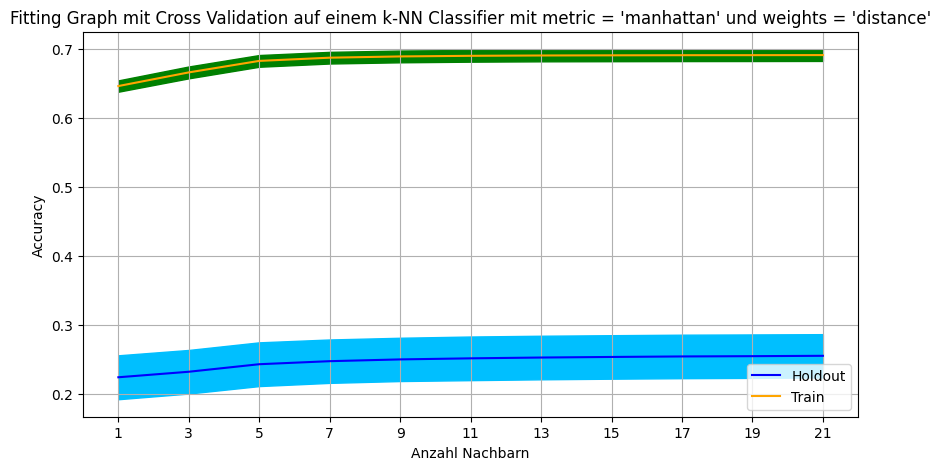

,
Anzahl Nachbarn,Test Accuracy
1,0.224014
3,0.232024
5,0.242951
7,0.247352
9,0.249930
11,0.251476
13,0.252649
15,0.253491
17,0.254223


In [29]:
#range(1,22,2)
results = [(0.22401375935455295, 0.031863925849074534, 0.6466030815251181, 0.008213947840493504), 
           (0.23202403088773052, 0.03163205990630507, 0.6664146863299876, 0.008598063643890921), 
           (0.24295116759962707, 0.03173924354863551, 0.6831070723177708, 0.008496201886753688), 
           (0.24735196357259293, 0.03148450193063435, 0.6877583441690449, 0.008452747681180218), 
           (0.24992992541040965, 0.031405923172209804, 0.6895826183381865, 0.008533301869979993), 
           (0.2514763738810661, 0.031661064952142645, 0.6904699752026302, 0.008501013569577876), 
           (0.25264937121339315, 0.03161121247740553, 0.6909518007223288, 0.008474735253683906), 
           (0.25349086919960306, 0.03155922799035928, 0.6911856187734495, 0.008532052859402424), 
           (0.2542229642986567, 0.031562099998138644, 0.6913674086922328, 0.008540679486370899), 
           (0.254629318176277, 0.03152777056077127, 0.6914286908037299, 0.008521343935619695), 
           (0.2551557684262216, 0.03140927343876034, 0.6915411784489296, 0.008501631093733229),]
        #    (0.25598328284820615, 0.03150485338985635, 0.6916182952104656, 0.008497538284698352), 
        #    (0.25643487850575014, 0.031479111695338985, 0.6916460572424616, 0.008486182173017581), 
        #    (0.2570098611932011, 0.03155448424676984, 0.691661069306341, 0.008492618058287708)]
test_acc_list = list(map(lambda x: x[0], results))[:30]
test_std_list = list(map(lambda x: x[1], results))[:30]
train_acc_list = list(map(lambda x: x[2], results))[:30]
train_std_list = list(map(lambda x: x[3], results))[:30]

lower_bound_test = np.array(test_acc_list) - np.array(test_std_list)
upper_bound_test = np.array(test_acc_list) + np.array(test_std_list)
lower_bound_train = np.array(train_acc_list) - np.array(train_std_list)
upper_bound_train = np.array(train_acc_list) + np.array(train_std_list)
k = list(range(1, 22, 2))
N = len(k)
ks = np.arange(N)
plt.subplots(figsize=(10, 5))

plt.plot(ks, test_acc_list, label="Holdout", 
color="blue")
plt.fill_between(ks, lower_bound_test, upper_bound_test, color="deepskyblue")


plt.plot(ks, train_acc_list, label="Train", 
color="orange")
plt.fill_between(ks, lower_bound_train, upper_bound_train, color="green")


plt.xticks(ks, k)
plt.grid(True)
plt.xlabel("Anzahl Nachbarn")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Fitting Graph mit Cross Validation auf einem k-NN Classifier mit metric = 'manhattan' und weights = 'distance'", fontsize=12)
plt.show()

knn_results_table = pd.DataFrame(results, columns=['Test Accuracy','1','2','3'])[['Test Accuracy']]
amount_neighbors = pd.Series(list(range(1, 21, 2)) + list(range(21, 41, 5)))
knn_results_table['Anzahl Nachbarn'] = amount_neighbors
knn_results_table.reset_index(inplace=True, drop=True)
knn_results_table.set_index(['Anzahl Nachbarn','Test Accuracy'], inplace=True)
knn_results_table

2. Lernkurve

In [24]:
test_sizes = list(np.flip(np.linspace(0.1,1,9,endpoint=False)))
learning_curve = []
for test_size in test_sizes:
    model = KNeighborsClassifier(n_neighbors=13, metric='manhattan', weights='distance')
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=test_size, random_state=42)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    learning_curve.append(score)
    print(f'Score {test_size}: {score}')
print(learning_curve)

Score 0.9: 0.20562442362407815
Score 0.8: 0.22616065773346825
Score 0.7000000000000001: 0.23995073932146704
Score 0.6: 0.25062995774690366
Score 0.5: 0.25876498120408986
Score 0.4: 0.26591277381569317
Score 0.30000000000000004: 0.2720101341624921
Score 0.2: 0.2774350368926289
Score 0.1: 0.2822594575919848
Score 0.05: 0.28620547832524473
[0.20562442362407815, 0.22616065773346825, 0.23995073932146704, 0.25062995774690366, 0.25876498120408986, 0.26591277381569317, 0.2720101341624921, 0.2774350368926289, 0.2822594575919848, 0.28620547832524473]


3. Confusion matrix

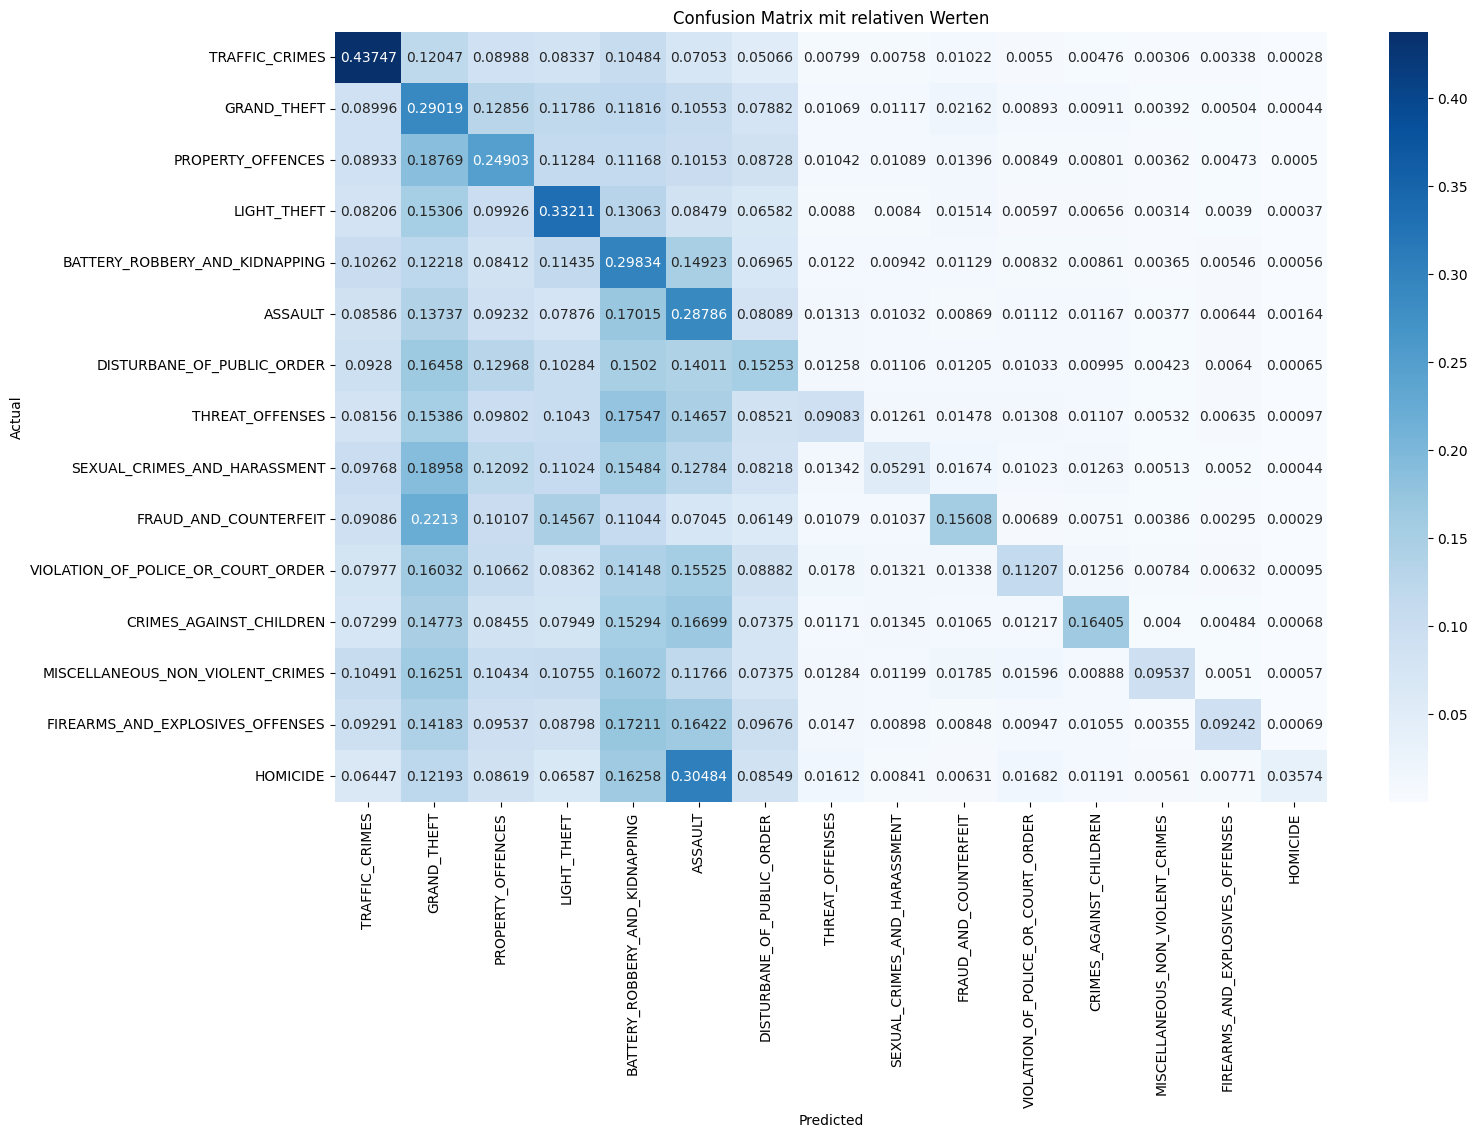

In [70]:
predict_data_encoded = cleaned_data[selection].copy()
kfold_knn = KFold(n_splits=10, shuffle=True, random_state=42)
actual_classes, predict_classes, _ = cross_val_predict(KNeighborsClassifier(n_neighbors=13, metric='manhattan', weights='distance'), kfold_knn, np.array(X_selected), np.array(y))
plot_confusion_matrix(actual_classes, predict_classes, sorted_labels, mode='relative')

## Darstellung der verschiedenen Lernkurven in einem Diagramm

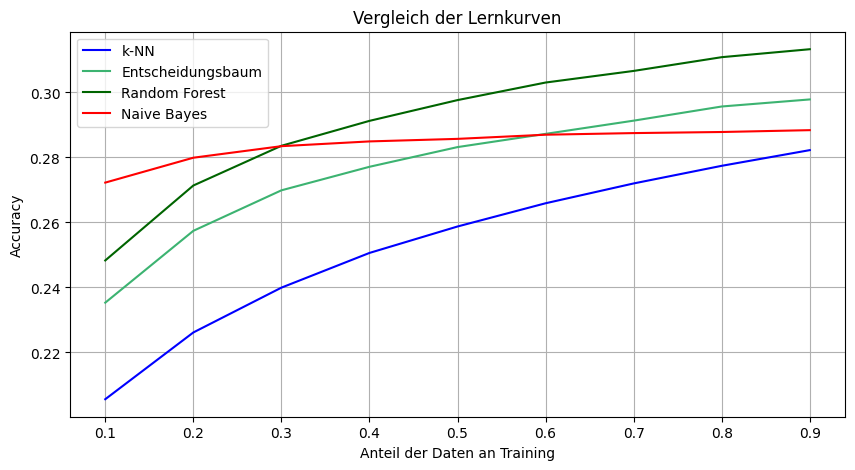

In [6]:
learning_curve_knn = [
    0.20562442362407815, 
    0.22616065773346825, 
    0.23995073932146704, 
    0.25062995774690366, 
    0.25876498120408986, 
    0.26591277381569317, 
    0.2720101341624921, 
    0.2774350368926289, 
    0.2822594575919848
]
learning_curve_dec_tree = [
    0.23532771969462243, 
    0.2574299369082579, 
    0.26989140793646876, 
    0.2771320539501573, 
    0.28319226118500607, 
    0.2872627890333884, 
    0.2913270104494841, 
    0.29568393258149694, 
    0.29785553882980037
]
learning_curve_rf = [
    0.24831805622961262,
    0.27137160789345965, 
    0.2835908590418375, 
    0.29126257516307613,
    0.29765153945495976, 
    0.3030542325757389, 
    0.306626963562531, 
    0.31085638608526844, 
    0.3133035560052316
]
learning_curve_nb = [
    0.27226696133243034, 
    0.27992436394146536, 
    0.28347334788121503, 
    0.2849410622773898,
    0.285724156651778, 
    0.28700367692421586, 
    0.2875020221712224, 
    0.2878365372751277, 
    0.2884041161809343
]
train_amount = list(map(lambda x: round(x, 1), list(np.linspace(0.1,1,9,endpoint=False))))
N = len(train_amount)
train_range = np.arange(N)
plt.subplots(figsize=(10, 5))

plt.plot(train_range, learning_curve_knn, color="blue", label='k-NN')
plt.plot(train_range, learning_curve_dec_tree, color="mediumseagreen", label='Entscheidungsbaum')
plt.plot(train_range, learning_curve_rf, color="darkgreen", label='Random Forest')
plt.plot(train_range, learning_curve_nb, color="red", label='Naive Bayes')

plt.xticks(train_range, train_amount)
plt.grid(True)
plt.xlabel("Anteil der Daten an Training")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Vergleich der Lernkurven', fontsize=12)
plt.show()